### Title: Data Bias Evalutaion

### Student Name: Florent R Ndeffo

### Date: 10/11/2024

### 1. Unbalanced Data Analysis: Gender distribution: Present findings from gender count analysis.

- Female employees: 472 (31.47%)
- Male employees: 1,028 (68.53%)

There is a significant gender imbalance in the dataset, with male employees making up nearly 69% of the workforce, while females represent only about 31%. This disparity could indicate potential gender bias in hiring or retention practices within the organization.

### 2. Bias Analysis in Feature Distributions:

- Feature Histograms: Include histograms and descriptions for continuous variables. (Already plotted, please scroll through the section named "Analyze Feature Distributions").
- Specific Bias Analysis: Include groupby mean comparison for gender and salary/benefits. (Already plotted, please scroll through the section named "Specific Bias Analysis Example").

### 3. Balancing and Unbiasing Methods: Methods Applied: Describe the techniques used:

- SMOTE generates synthetic samples by interpolating between existing minority class samples. Rather than simply duplicating these samples, it creates new data points by combining the feature spaces of neighboring samples. This approach enhances the robustness of the dataset.

- The reweighting technique adjusts the weights of samples based on the inverse frequency of a group in the dataset. For instance, if a group is underrepresented compared to another, the technique assigns higher weights to individuals from the underrepresented group. This ensures that the model gives more balanced consideration to all groups during analysis or training.

### . Results: Summarize the outcomes of applied methods

- SMOTE: Addressed the class imbalance in the target variable quit by generating synthetic samples for the minority class. This balanced the dataset, preventing machine learning models from disproportionately favoring the majority class. As a result, the models were better equipped to predict employee attrition, enhancing both performance and fairness by reducing the impact of class imbalance and leading to more accurate outcomes for employees who quit.

- Reweighting for Bias Reduction: Tackled salary and benefit disparities across genders by applying higher weights to underrepresented groups. This adjustment corrected for biases in salary and benefits between male and female employees by ensuring that the contributions of female employees were more accurately reflected during analysis or model training. By compensating for gender imbalances and salary discrepancies, this method reduced bias, promoting more equitable and fair analyses and decision-making processes.

### 4. Conclusion: Summary of findings.

In this project, data disparities and imbalances were systematically addressed to enhance both the accuracy and fairness of predictive models focused on employee outcomes. The target variable quit initially faced a significant class imbalance, which was resolved using SMOTE. This technique generated synthetic samples for the underrepresented class, balancing the dataset and reducing the bias toward the majority class in machine learning models. As results, the models became more accurate and reliable in predicting employee attrition, leading to better overall performance and fairness.

Furthermore, gender-based discrepancies in salary and benefits were identified and addressed using reweighting techniques. By assigning higher weights to underrepresented groups, particularly female employees, the analysis corrected for initial imbalances in gender distribution and compensation. This adjustment minimized gender bias, ensuring that the analyses and decisions were more equitable across all demographic groups.

The project improved model accuracy and fairness, leading to more reliable and unbiased predictions regarding employee attrition and salary/benefit equity. These efforts ensured that the outcomes more accurately reflected the diverse workforce, enhancing the overall validity and fairness of the analysis.

### . Recommendations for adressing identifyied biases

- Regularly Apply Resampling Techniques: To address imbalanced target variables, periodically apply methods like SMOTE or other resampling techniques during model training. This practice ensures that the model continues to generate fair predictions as new data is incorporated. Combining oversampling for minority classes and undersampling for majority classes, when appropriate, can further enhance dataset balance.

- Implement Fairness-Aware Algorithms: Use machine learning algorithms that explicitly integrate fairness constraints to prevent biased outcomes. Approaches such as adversarial debiasing or fairness-constrained optimization within model training help ensure that final predictions do not reinforce existing biases in the data.

- Use Reweighting Strategies for Demographic Equity: Continuously apply and refine reweighting strategies to address demographic imbalances, especially regarding salary or benefit disparities across gender. These weights should be dynamically adjusted as new employees join or leave, and as salary and benefit structures evolve, to maintain equity over time.

- Conduct Bias Audits on Models: Regularly audit model performance across different demographic groups, measuring key outcomes such as false positive/negative rates, precision, and recall. This ensures that the model performs equitably across all groups. If biases are found, corrective actions like fairness-constrained retraining should be implemented.

- Encourage Transparent Reporting: Maintain transparency in how bias mitigation techniques, such as SMOTE, reweighting, or fairness-aware algorithms, are applied. Document their impact on model performance and fairness to foster trust among stakeholders and demonstrate a commitment to addressing bias.

- Incorporate Diverse Representation in Data Collection: Ensure future data collection efforts prioritize diversity in employee demographics and work conditions. This reduces the risk of underrepresentation and helps mitigate the potential for biased models due to incomplete or skewed data.

- Collaborate with HR and Legal Departments: Work closely with HR and legal teams to ensure that data-driven insights comply with fair employment practices. This collaboration ensures that analyses of demographic factors such as gender, salary, and employment outcomes meet both legal requirements and ethical standards.nt outcomes.

## Setting up the Environment

### Load the Dataset import pandas as pd

In [84]:
import pandas as pd

employee_data = pd.read_csv('historical employee data.csv')
employee_data.head()

,age,gender,education,previous_income,salary,benefits,dependents,pto,months_of_employment,supervisor,team,department,employees_under_supervision,quit,fired,race
0,40,Female,Bachelor's,36449,66764,7379,0,3,31,0,4,Sales,10,1,0,Hispanic
1,63,Male,Master's,55464,106689,11023,4,0,65,1,8,Marketing,8,0,1,Black
2,40,Male,Bachelor's,43908,90709,5041,4,7,37,0,2,HR,0,0,1,White
3,39,Female,Bachelor's,70805,129867,3094,3,24,18,1,7,Marketing,1,0,0,White
4,29,Male,Master's,87692,65409,2598,5,14,28,1,6,Marketing,10,0,0,White


### Evaluate Unbalanced Data
• Gender Imbalance Example: print(data['gender'].value_counts(normalize=True))
Check if the gender distribution is skewed, indicating potential gender bias.

In [16]:
# Let's estimate the gender proportion
gender_distribution = employee_data['gender'].value_counts(normalize=True)

# Now let's print the gender distribution as percentages
print(gender_distribution * 100)

threshold = 0.40 
is_skewed = gender_distribution.min() < threshold

if is_skewed:
    print("The gender distribution is skewed, therefore there is gender bias.")
else:
    print("The gender distribution is balanced.")

gender
Male      68.533333
Female    31.466667
Name: proportion, dtype: float64
The gender distribution is skewed, indicating potential gender bias.


### Analyze Feature Distributions
• Histograms for Continuous Variables: data[['age', 'previous_income', 'salary',
'dependents', 'pto', 'months_of_employment',
'employees_under_supervision']].hist(bins=50, figsize=(20, 15)) plt.show() Plot
histograms to visually inspect the distribution of continuous features and identify
potential biases.

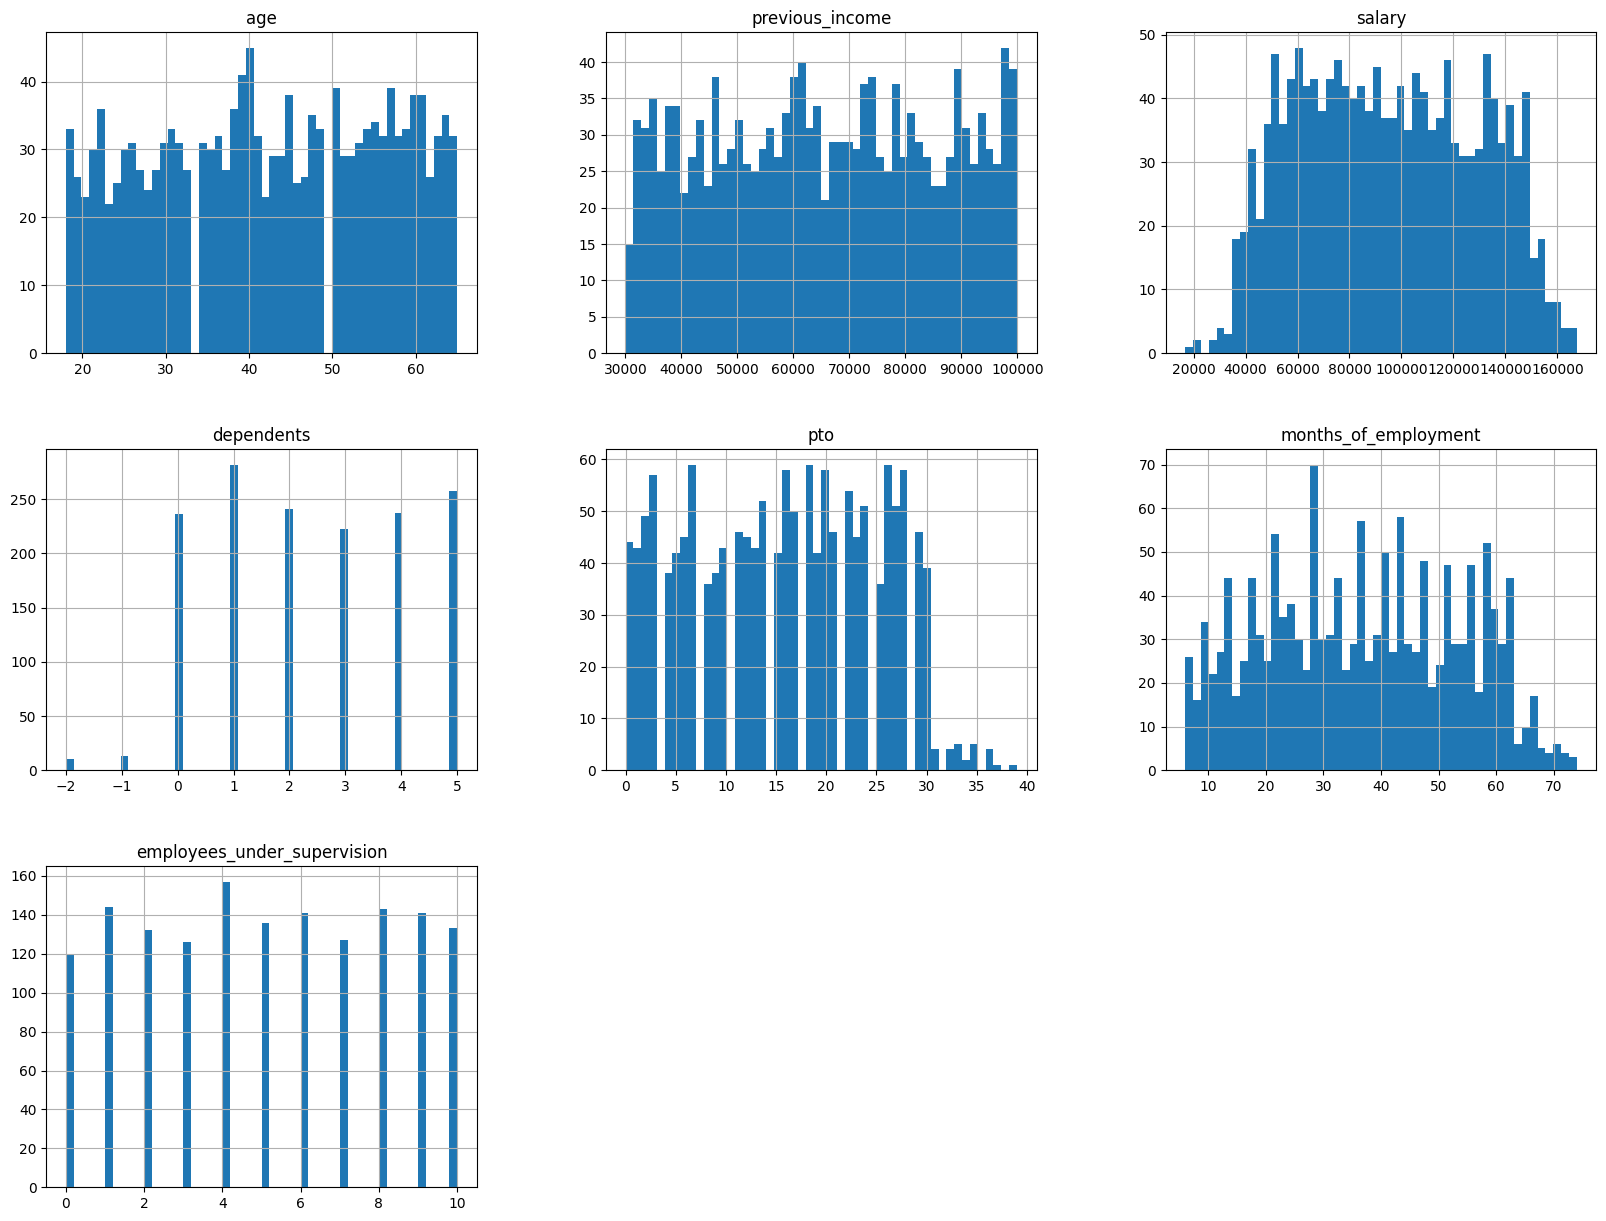

In [20]:
import matplotlib.pyplot as plt

# The continuous variables
continuous_columns = ['age', 'previous_income', 'salary', 
                      'dependents', 'pto', 'months_of_employment', 
                      'employees_under_supervision']

# Histograms for continuous variables
employee_data[continuous_columns].hist(bins=50, figsize=(20, 15))

# Display the plots
plt.show()

### Specific Bias Analysis Example
• Gender and Salary/Benefits: data.groupby('gender')[['salary', 'benefits']].mean()
Compare average salaries and benefits across genders to identify discrepancies.

In [24]:
# Grouping the data by gender and calculate the mean of salary and benefits
gender_salary_benefits_comparison = employee_data.groupby('gender')[['salary', 'benefits']].mean()

# The result
print(gender_salary_benefits_comparison)

              salary     benefits
gender                           
Female  91851.286017  5382.355932
Male    96311.548638  6520.836576


#### Comparison
Salary Discrepancy: On average, male employees earn approximately 4,460 more than female employees.

Benefits Discrepancy: Male employees also receive higher benefits, with an average differece of about 1,138.48.

### Approach to Balance Data
• Synthetic Minority Over-sampling Technique (SMOTE): from
imblearn.over_sampling import SMOTE
smote = SMOTE() X = data.drop(['quit', 'fired'], axis=1) y = data['quit'] # Assuming 'quit' is
the target variable X_resampled, y_resampled = smote.fit_resample(X, y) balanced_data =
pd.concat([X_resampled, y_resampled], axis=1)

In [9]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Let's define the feature set X, the target variable y
X = employee_data.drop(['quit', 'fired'], axis=1)
y = employee_data['quit'] 

# Applying one-hot encoding for categorical columns
categorical_columns = ['gender', 'education', 'team', 'department', 'race']
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# SMOTE
smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Concatenating X and y
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X_encoded.columns), pd.DataFrame(y_resampled, columns=['quit'])], axis=1)

# The first few rows of the balanced dataset
balanced_data.head()

,age,previous_income,salary,benefits,dependents,pto,months_of_employment,supervisor,employees_under_supervision,gender_Female,...,team_10,department_HR,department_IT,department_Marketing,department_Sales,race_Asian,race_Black,race_Hispanic,race_White,quit
0,40,36449,66764,7379,0,3,31,0,10,True,...,False,False,False,False,True,False,False,True,False,1
1,63,55464,106689,11023,4,0,65,1,8,False,...,False,False,False,True,False,False,True,False,False,0
2,40,43908,90709,5041,4,7,37,0,0,False,...,False,True,False,False,False,False,False,False,True,0
3,39,70805,129867,3094,3,24,18,1,1,True,...,False,False,False,True,False,False,False,False,True,0
4,29,87692,65409,2598,5,14,28,1,10,False,...,False,False,False,True,False,False,False,False,True,0


### Approach to Unbias Data
• Reweighting Examples: def reweight_data(data, group_col, target_col): group_counts
= data[group_col].value_counts(normalize=True) weights = 1 /
group_counts[data[group_col]].values data['weights'] = weights return data
unbiased_data = reweight_data(data, 'gender', 'salary')

In [12]:
# Here's the reweighting function
def reweight_data(data, group_col, target_col):
    # Let's compute the normalized group counts
    group_counts = data[group_col].value_counts(normalize=True)
    
    # Let's compute weights
    weights = 1 / group_counts[data[group_col]].values
    
    # Adding a new 'weights' column to the dataset
    data['weights'] = weights
    
    return data

# Applying the reweighting function on the dataset for 'gender' and 'salary'
unbiased_data = reweight_data(employee_data, 'gender', 'salary')

# First few rows of the reweighted data
print(unbiased_data[['gender', 'salary', 'weights']].head())

   gender  salary   weights
0  Female   66764  3.177966
1    Male  106689  1.459144
2    Male   90709  1.459144
3  Female  129867  3.177966
4    Male   65409  1.459144


### Document Findings Use the provided documentation template to record your findings, including:
#### • Data Bias: Distribution of features and target variable.

Categorical Variables Distribution:

- Gender: According to the graph we can observe a trend towards the male gender.

- Education: According to the graph we can observe a trend in Master's degree.

- Race: According to the graph we can observe a trend.

- Department: According to the graph we can observe that it appears to be some variability in department sizes, with certain departments having more employees.

Team: According to the graph we can observe that teams are distributed unevenly, indicating some teams have significantly more members.

Continuous Variables Distribution:

- Age: According to the graph we can observe that the distribution seems to be centered around mid-career employees, with a spread from younger to older workers.

- Previous Income and Salary: According to the graph we can observe that both have right-skewed distributions, meaning most employees earn in a similar range, but a few have higher incomes.

- Dependents: According to the graph we can observe that the majority of employees seem to have few dependents.

- PTO and Months of Employment: According to the graph we can observe that there's a wide range in PTO days and employment length, which is expected in organizations.

- Employees Under Supervision: According to the graph we can observe that most employees supervise a small number of people, with a few supervising more.

Target Variables:

- Quit: According to the graph we can observe that a small proportion of employees quit, suggesting class imbalance in this target variable.

- Fired: According to the graph we can observe that not many employees are fired, indicating a potential class imbalance in this target variable as well.

#### • Bias Analysis: Disparities across different groups.

In [21]:
# Let's compare salary and benefits across gender
gender_disparities = employee_data.groupby('gender')[['salary', 'benefits']].mean()
print("Salary and Benefits Disparities by Gender:\n", gender_disparities)

# Let's compare salary and benefits across race
race_disparities = employee_data.groupby('race')[['salary', 'benefits']].mean()
print("\nSalary and Benefits Disparities by Race:\n", race_disparities)

# Here are employment outcomes across gender
gender_outcomes = employee_data.groupby('gender')[['quit', 'fired']].mean()
print("\nEmployment Outcomes by Gender (Quit and Fired Rates):\n", gender_outcomes)

# Here are employment Outcomes across race
race_outcomes = employee_data.groupby('race')[['quit', 'fired']].mean()
print("\nEmployment Outcomes by Race (Quit and Fired Rates):\n", race_outcomes)

# Let's compare salary across education levels
education_disparities = employee_data.groupby('education')[['salary', 'benefits']].mean()
print("\nSalary and Benefits Disparities by Education Level:\n", education_disparities)

Salary and Benefits Disparities by Gender:
               salary     benefits
gender                           
Female  91851.286017  5382.355932
Male    96311.548638  6520.836576

Salary and Benefits Disparities by Race:
                 salary     benefits
race                               
Asian     99126.078818  6284.788177
Black     84880.596774  6145.645161
Hispanic  86028.939655  6060.155172
White     96248.754967  6152.357616

Employment Outcomes by Gender (Quit and Fired Rates):
             quit     fired
gender                    
Female  0.025424  0.201271
Male    0.051556  0.178016

Employment Outcomes by Race (Quit and Fired Rates):
               quit     fired
race                        
Asian     0.059113  0.147783
Black     0.024194  0.564516
Hispanic  0.008621  0.551724
White     0.046358  0.107852

Salary and Benefits Disparities by Education Level:
                    salary     benefits
education                             
Bachelor's   92198.303371  5471.92134

This analysis shows disparities across differents groups:

- Gender bias in salary and benefits, with males earning more.
- Racial disparities, with Black and Hispanic employees earning less and facing much higher termination rates.
- Uneven compensation for education levels, with PhD holders earning less than those with a Master's.

#### • Balancing and Unbiasing Methods: Applied techniques and their outcomes.
Reweighting: This method adjusts the sample weights based on the gender proportion to correct for salary disparities.

In [49]:
# Let's reweight function to correct gender disparities in salary
def reweight_data(data, group_col, target_col):
    group_counts = data[group_col].value_counts(normalize=True)
    weights = 1 / group_counts[data[group_col]].values
    data['weights'] = weights
    return data

# Let's apply reweighting based on gender and salary
unbiased_data = reweight_data(employee_data, 'gender', 'salary')

# Displaying the reweighted data
print(unbiased_data[['gender', 'salary', 'weights']].head())

   gender  salary   weights
0  Female   66764  3.177966
1    Male  106689  1.459144
2    Male   90709  1.459144
3  Female  129867  3.177966
4    Male   65409  1.459144


#### • Recommendations: Strategies to mitigate identified biases.

- Address Salary and Benefits Inequities: Implement a compensation audit process to identify and rectify discrepancies, ensuring fair salary adjustments to close any gaps.

- Minimize Bias in Employment Decisions: Develop objective, data-driven performance metrics that ensure fairness and uniformity in evaluations across all employee groups.

- Tackle Class Imbalance in Workforce Data: Apply techniques like SMOTE or class weighting during machine learning model training to prevent bias toward the majority class.

- Foster Diversity and Inclusion in Recruitment and Advancement: Anonymize resumes in the initial hiring stages to focus on qualifications rather than personal identifiers.

Ongoing Bias Monitoring and Assessment: Leverage automated tools to regularly review and address gender and racial disparities in salaries, promotions, and employment outcomes.

- Consistent Diversity and Inclusion Reporting: Provide regular updates to employees and stakeholders on diversity and inclusion efforts, underscoring the organization's commitment to progress.